# 🌟 **Exploratory Data Analysis and Interactive Visualization** 🌟

<style>
@keyframes slideIn {
    from {
        transform: translateX(-100%);
        opacity: 0;
        }
        50% {
        transform: translateX(50%);
        opacity: 0.5;
        }
        100% {
        transform: translateX(0);
        opacity: 1;
        }
    }

    h1 {
        color: #FF5733; /* A vibrant orange-red color */
        font-family: 'Verdana', sans-serif;
        text-align: center;
        font-weight: bold;
        animation: slideIn 3s ease-in-out infinite alternate;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); /* Adding a shadow for better visual appeal */
    }
    h1 span {
        display: inline-block;
        animation: slideIn 3s ease-in-out infinite alternate;
        transform-origin: center; /* Ensures the sliding effect is centered */
    }
</style>

In [67]:
#Eploratory Data Analysis (EDA)
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [68]:
#loading the dataset
df = pd.read_csv(r"C:\Users\sanga\Downloads\Air-Quality-predictor-of-kathmandu-main\data\processed\processed_data.csv")

In [69]:
# Convert datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['MonthName'] = df['Datetime'].dt.strftime('%B')
df['DayOfWeek'] = df['Datetime'].dt.day_name()

In [70]:
# Add Season
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Monsoon", 7: "Monsoon", 8: "Monsoon",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
df["Season"] = df["Month"].map(season_map)


In [71]:
# Basic Statistics Summary
summary = df.describe().T
summary["missing_values"] = df.isnull().sum()
summary["unique_values"] = df.nunique()
summary = summary[["mean", "std", "min", "25%", "50%", "75%", "max", "missing_values", "unique_values"]]
summary.style.background_gradient(cmap='viridis').set_caption("🔍 Descriptive Statistics")


C:\Users\sanga\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



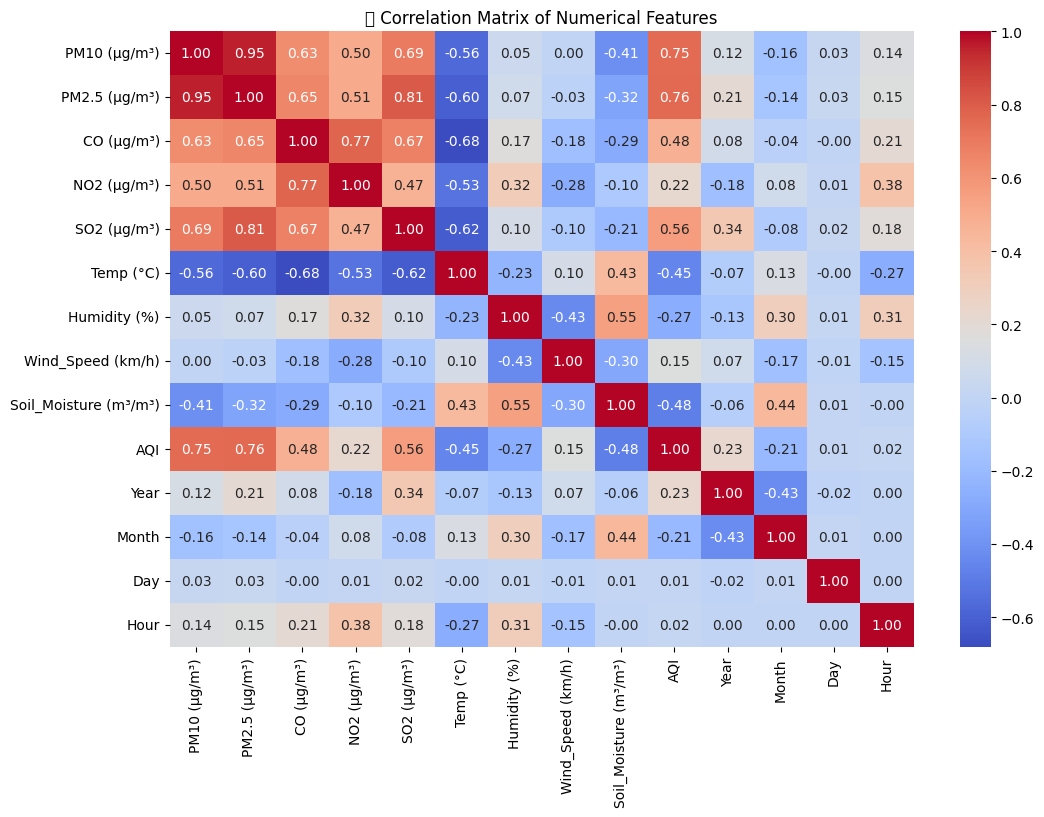

In [72]:
#Visualization
#  Histogram of AQI
px.histogram(df, x="AQI", nbins=50, title="📊 AQI Distribution in Kathmandu")

# Pollutant-wise distribution
for col in ['PM2.5 (μg/m³)', 'PM10 (μg/m³)', 'CO (μg/m³)', 'NO2 (μg/m³)', 'SO2 (μg/m³)']:
    fig = px.histogram(df, x=col, nbins=50, title=f"📊 Distribution of {col}")
    fig.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📈 Correlation Matrix of Numerical Features")
plt.show()

In [73]:
# Monthly averages
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = df.groupby('MonthName')[['AQI', 'PM2.5 (μg/m³)', 'PM10 (μg/m³)', 'CO (μg/m³)', 'NO2 (μg/m³)', 'SO2 (μg/m³)']].mean().loc[month_order]

In [74]:
# Yearly AQI average
yearly_avg = df.groupby("Year")["AQI"].mean().reset_index()

In [75]:
#  Correlation matrix
corr = df.drop(columns=["Datetime", "Month", "Year", "Hour", "Day", "DayOfWeek", "MonthName", "Season"]).corr()


In [85]:
# Initialize  layout with subplots
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "📈 AQI Over Time",
        "📊 Monthly Average AQI & Pollutants",
        "📦 Seasonal AQI Distribution",
        "🗓️ Yearly AQI Trend",
        "🧪 Correlation Heatmap",
        "📉 Pollutants vs AQI Over Time"
    ),
    vertical_spacing=0.15,
    specs=[[{"type": "xy"}, {"type": "xy"}],
           [{"type": "box"}, {"type": "xy"}],
           [{"type": "heatmap"}, {"type": "xy"}]]
)

In [86]:
# 1️ AQI Over Time
fig.add_trace(go.Scatter(
    x=df["Datetime"], y=df["AQI"], mode="lines", name="AQI",
    line=dict(color="orange")
), row=1, col=1)

# 2️ Monthly Average
for pollutant in ['AQI', 'PM2.5 (μg/m³)', 'PM10 (μg/m³)']:
    fig.add_trace(go.Bar(
        x=monthly_avg.index, y=monthly_avg[pollutant], name=pollutant
    ), row=1, col=2)

# 3️ Seasonal Boxplot
for season in df["Season"].unique():
    fig.add_trace(go.Box(
        y=df[df["Season"] == season]["AQI"], name=season
    ), row=2, col=1)

# 4️ Yearly AQI Trend
fig.add_trace(go.Scatter(
    x=yearly_avg["Year"], y=yearly_avg["AQI"], mode="lines+markers", name="Yearly AQI",
    line=dict(color='green')
), row=2, col=2)

# 5️ Correlation Heatmap
fig.add_trace(go.Heatmap(
    z=corr.values, x=corr.columns, y=corr.columns,
    colorscale="Viridis"
), row=3, col=1)

# 6️ Pollutants vs AQI Over Time
for pollutant in ['PM2.5 (μg/m³)', 'PM10 (μg/m³)', 'CO (μg/m³)', 'NO2 (μg/m³)', 'SO2 (μg/m³)']:
    fig.add_trace(go.Scatter(
        x=df["Datetime"], y=df[pollutant], mode="lines", name=pollutant
    ), row=3, col=2)

# 🎨 Layout settings
fig.update_layout(
    height=1500,
    width=1300,
    title_text="🌁 Comprehensive Air Pollution Visualization – Kathmandu (Interactive)",
    showlegend=False,
    template="plotly_white"
)

#  Showing  the visualization inline in Jupyter
fig.show()